### 企业造血能力分析 - 收入含金量

In [1]:
from analysis import ANALYSIS_CONFIGS
from analysis.analysis import FinancialAnalysis
from analysis.doc_utils import ReportDocument

In [2]:
ANALYSIS_CONFIGS

['all_analysis.json',
 'asset_quality_analysis.json',
 'asset_indepth_analysis.json',
 'asset_fraud_analysis.json',
 'profit_analysis.json',
 'cash_flow_analysis.json']

In [3]:
analysis = FinancialAnalysis(ANALYSIS_CONFIGS[5])
images, titles, fields = analysis.images, analysis.titles, analysis.fields

In [4]:
t1 = analysis.init_table('t1')
t1['现金占营业收入的比率'] = t1['销售商品、提供劳务收到的现金(元)'] / t1['其中：营业收入(元)']

analysis.format_show_table('t1')

,2015,2016,2017,2018,2019,2020
销售商品、提供劳务收到的现金(元),"4,772,789,000","6,376,116,600","7,197,061,800","8,453,586,900","7,864,881,700","8,100,485,200"
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
现金占营业收入的比率,105.06%,110.03%,102.56%,113.85%,101.34%,99.65%


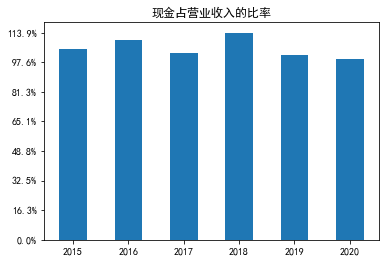

In [5]:
analysis.show_plot('t1')

In [6]:
t2 = analysis.init_table('t2')
t2['净利润现金比率'] = t2['经营活动产生的现金流量净额(元)'] / t2['五、净利润(元)']

analysis.format_show_table('t2')

,2015,2016,2017,2018,2019,2020
经营活动产生的现金流量净额(元),"1,123,649,800","1,545,448,500","1,272,482,600","1,508,960,300","1,555,220,900","1,537,300,000"
五、净利润(元),"827,950,300","1,206,814,400","1,461,194,100","1,483,847,900","1,614,245,400","1,687,357,900"
净利润现金比率,135.71%,128.06%,87.09%,101.69%,96.34%,91.11%


In [7]:
print(f"连续 5 年的平均净利润现金含量：{t2['净利润现金比率'].mean():.2%}")

连续 5 年的平均净利润现金含量：106.67%


### 企业增长潜能：投资活动现金流分析

In [8]:
t3 = analysis.init_table('t3')
t3['投资占经营净现金流的比例'] = \
t3['购建固定资产、无形资产和其他长期资产支付的现金(元)'] / t3['经营活动产生的现金流量净额(元)']

analysis.format_show_table('t3')

,2015,2016,2017,2018,2019,2020
购建固定资产、无形资产和其他长期资产支付的现金(元),"278,075,100","199,329,700","146,347,300","180,703,200","272,163,300","282,289,900"
经营活动产生的现金流量净额(元),"1,123,649,800","1,545,448,500","1,272,482,600","1,508,960,300","1,555,220,900","1,537,300,000"
投资占经营净现金流的比例,24.75%,12.90%,11.50%,11.98%,17.50%,18.36%
销售商品、提供劳务收到的现金(元),"4,772,789,000","6,376,116,600","7,197,061,800","8,453,586,900","7,864,881,700","8,100,485,200"


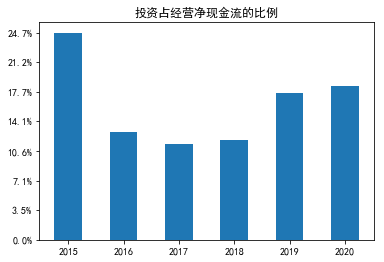

In [9]:
analysis.show_plot('t3')

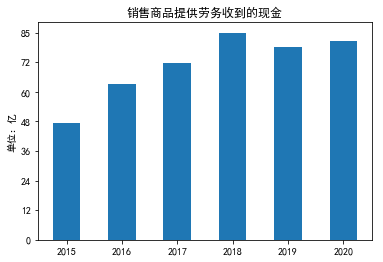

In [10]:
analysis.show_plot('t3', image_index=1)

### 分红情况：筹资活动产生的现金流

In [11]:
t4 = analysis.init_table('t4')
t4['分红金额'] = [292000000, 365000000, 712000000, 759000000, 475000000, 475000000]
t4['分红占经营现金净额的比例'] = t4['分红金额'] / t4['经营活动产生的现金流量净额(元)']

analysis.format_show_table('t4')

,2015,2016,2017,2018,2019,2020
分红金额,"292,000,000","365,000,000","712,000,000","759,000,000","475,000,000","475,000,000"
经营活动产生的现金流量净额(元),"1,123,649,800","1,545,448,500","1,272,482,600","1,508,960,300","1,555,220,900","1,537,300,000"
分红占经营现金净额的比例,25.99%,23.62%,55.95%,50.30%,30.54%,30.90%


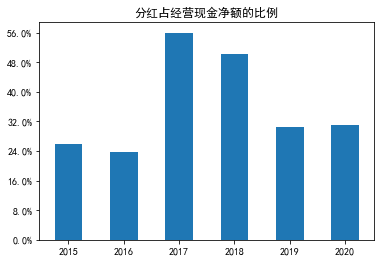

In [12]:
analysis.show_plot('t4')

### 公司类型：经营、投资、筹资活动净额的正负

In [13]:
t5 = analysis.init_table('t5')
t5_tmp = t5.copy()

t5_tmp.loc[t5['经营活动产生的现金流量净额(元)']>0, '经营活动产生的现金流量净额(元)'] = "正"
t5_tmp.loc[t5['经营活动产生的现金流量净额(元)']<0, '经营活动产生的现金流量净额(元)'] = "负"

t5_tmp.loc[t5['投资活动产生的现金流量净额(元)']>0, '投资活动产生的现金流量净额(元)'] = "正"
t5_tmp.loc[t5['投资活动产生的现金流量净额(元)']<0, '投资活动产生的现金流量净额(元)'] = "负"

t5_tmp.loc[t5['筹资活动产生的现金流量净额(元)']>0, '筹资活动产生的现金流量净额(元)'] = "正"
t5_tmp.loc[t5['筹资活动产生的现金流量净额(元)']<0, '筹资活动产生的现金流量净额(元)'] = "负"

t5_tmp['三大活动现金流量净额类型'] = t5_tmp['经营活动产生的现金流量净额(元)'] + \
t5_tmp['投资活动产生的现金流量净额(元)'] + t5_tmp['筹资活动产生的现金流量净额(元)']
t5['三大活动现金流量净额类型'] = t5_tmp['三大活动现金流量净额类型']

analysis.format_show_table('t5', ignore=['三大活动现金流量净额类型'])

,2015,2016,2017,2018,2019,2020
经营活动产生的现金流量净额(元),"1,123,649,800","1,545,448,500","1,272,482,600","1,508,960,300","1,555,220,900","1,537,300,000"
投资活动产生的现金流量净额(元),"-305,773,451","-198,322,518","-1,782,469,713","-1,183,503,791","1,055,539,452","-1,217,671,577"
筹资活动产生的现金流量净额(元),"-100,627,000","-226,383,520","-365,205,405","-711,857,630","-759,219,240","-461,785,848"
三大活动现金流量净额类型,正负负,正负负,正负负,正负负,正正负,正负负


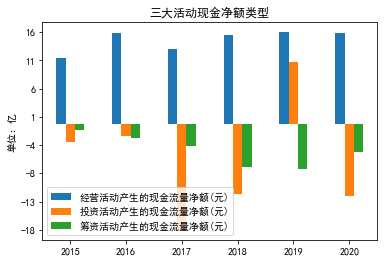

In [14]:
analysis.show_plot('t5')

### 现金增长情况：现金及现金等价物净增加额

In [15]:
t6 = analysis.init_table('t6')
# 当年的分红其实是上一年年报中计划的分红，而实际分红可能会和年报中披露的不一致，需要查同花顺个股获取当年的分红
t6['分红金额'] = [162000000, 292000000, 365000000, 712000000, 759000000, 475000000]
t6['分红+现金净增加额'] = t6.T[:2].sum()

analysis.format_show_table('t6')

,2015,2016,2017,2018,2019,2020
五、现金及现金等价物净增加额(元),"717,602,200","1,121,281,600","-876,051,800","-385,568,200","1,852,076,400","-143,199,800"
分红金额,"162,000,000","292,000,000","365,000,000","712,000,000","759,000,000","475,000,000"
分红+现金净增加额,"879,602,200","1,413,281,600","-511,051,800","326,431,800","2,611,076,400","331,800,200"


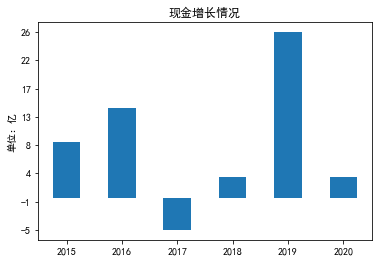

In [16]:
analysis.show_plot('t6')

### 可用现金情况：期末现金及现金等价物余额

In [17]:
t7 = analysis.init_table('t7')
t7['有息负债总额'] = t7.T[1:6].sum()
t7['期末现金余额-有息负债'] = t7['六、期末现金及现金等价物余额(元)'] - t7['有息负债总额']

analysis.format_show_table('t7')

,2015,2016,2017,2018,2019,2020
六、期末现金及现金等价物余额(元),"2,317,558,200","3,438,839,800","2,562,788,000","2,177,219,900","4,029,296,300","3,886,096,500"
短期借款(元),0,0,0,0,0,"6,076,200"
一年内到期的非流动负债(元),0,0,0,0,0,0
长期借款(元),0,0,0,0,0,0
应付债券(元),0,0,0,0,0,0
长期应付款,0,0,0,0,0,0
有息负债总额,0,0,0,0,0,"6,076,200"
期末现金余额-有息负债,"2,317,558,200","3,438,839,800","2,562,788,000","2,177,219,900","4,029,296,300","3,880,020,300"


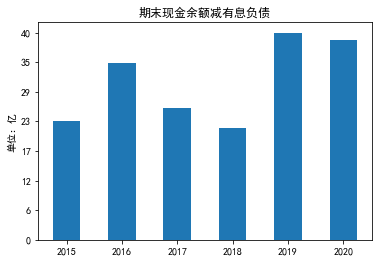

In [18]:
analysis.show_plot('t7')

### 考虑用理财产品还债：准货币资金减有息负债

In [19]:
t8 = analysis.init_table('t8')
t8['准货币资金'] = t8.T[:4].sum()
t8['有息负债总额'] = t8.T[5:10].sum()
t8['总货币资金与有息负债之差'] = t8['准货币资金'] - t8['有息负债总额']

analysis.format_show_table('t8')

,2015,2016,2017,2018,2019,2020
货币资金(元),"2,323,218,500","3,448,409,300","2,581,883,300","2,196,706,800","4,054,121,700","3,921,052,700"
交易性金融资产(元),0,0,0,0,"1,360,000,000","2,352,000,000"
其他流动资产里的理财产品,0,0,"1,500,000,000","2,570,000,000",0,0
其他流动资产里的结构性存款,0,0,0,0,0,0
准货币资金,"2,323,218,500","3,448,409,300","4,081,883,300","4,766,706,800","5,414,121,700","6,273,052,700"
短期借款(元),0,0,0,0,0,"6,076,200"
一年内到期的非流动负债(元),0,0,0,0,0,0
长期借款(元),0,0,0,0,0,0
应付债券(元),0,0,0,0,0,0
长期应付款,0,0,0,0,0,0


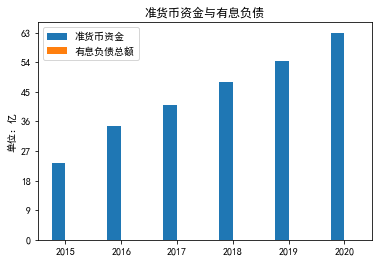

In [20]:
analysis.show_plot('t8')

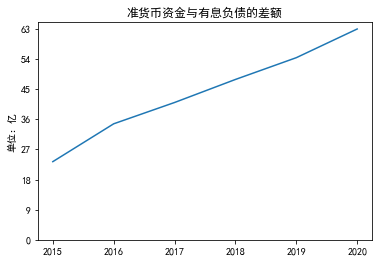

In [21]:
analysis.show_plot('t8', image_index=1)

### 输出分析报告

In [22]:
ReportDocument(analysis).save()